In [20]:
import os
import random
from tqdm.notebook import tqdm

import numpy as np
import pandas as pd


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

ROOT_DIR = "./data"
RANDOM_STATE = 110

np.random.seed(RANDOM_STATE)
%matplotlib inline

In [21]:
# read csv
df = pd.read_csv(os.path.join(ROOT_DIR, "train.csv"))
df.head()

,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,Insp. Seq No._Dam,Insp Judge Code_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION X Unit Time_Dam,CURE END POSITION X Judge Value_Dam,...,Production Qty Collect Result_Fill2,Production Qty Unit Time_Fill2,Production Qty Judge Value_Fill2,Receip No Collect Result_Fill2,Receip No Unit Time_Fill2,Receip No Judge Value_Fill2,WorkMode Collect Result_Fill2,WorkMode Unit Time_Fill2,WorkMode Judge Value_Fill2,target
0,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XA938-1,1,OK,240.0,NaN,NaN,...,7,NaN,NaN,127,NaN,NaN,1,NaN,NaN,Normal
1,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,3KPM0016-2,1,OK,240.0,NaN,NaN,...,185,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal
2,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1X9167-1,1,OK,1000.0,NaN,NaN,...,10,NaN,NaN,73,NaN,NaN,1,NaN,NaN,Normal
3,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3K1X0057-1,1,OK,1000.0,NaN,NaN,...,268,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal
4,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3HPM0007-1,1,OK,240.0,NaN,NaN,...,121,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal


In [22]:
nan_columns = df.columns[df.isnull().any()]
# 대부분 전부 NaN이거나 최소 약 만 천 개 이상 NaN이라서 전부 삭제
df.drop(nan_columns, axis=1, inplace=True) # 464 entries -> 178 entries

In [23]:
df["target"].unique()

array(['Normal', 'AbNormal'], dtype=object)

In [24]:
df["target"] = df["target"].map({"Normal": 0, "AbNormal": 1})

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Columns: 178 entries, Wip Line_Dam to target
dtypes: float64(72), int64(78), object(28)
memory usage: 55.0+ MB


In [26]:
df.head()

,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,Insp. Seq No._Dam,Insp Judge Code_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,...,Head Clean Position Z Collect Result_Fill2,Head Purge Position X Collect Result_Fill2,Head Purge Position Y Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,WorkMode Collect Result_Fill2,target
0,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XA938-1,1,OK,240.0,2.5,-90,...,50.0,91.8,270,50,114.612,19.9,7,127,1,0
1,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,3KPM0016-2,1,OK,240.0,2.5,-90,...,91.8,270.0,50,85,19.600,7.0,185,1,0,0
2,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1X9167-1,1,OK,1000.0,12.5,90,...,50.0,91.8,270,50,114.612,19.8,10,73,1,0
3,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3K1X0057-1,1,OK,1000.0,12.5,90,...,91.8,270.0,50,85,19.900,12.0,268,1,0,0
4,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3HPM0007-1,1,OK,240.0,2.5,-90,...,91.8,270.0,50,85,19.700,8.0,121,1,0,0


In [27]:
CAT = ["Dam", "AutoClave", "Fill1", "Fill2"]

In [34]:
wip_line = [f"Wip Line_{cat}" for cat in CAT]
sum(df.duplicated(subset=wip_line)) # 전부 동일한 행

40505

In [33]:
for cat in CAT:
    print(df[f"Wip Line_{cat}"].unique())

['IVI-OB6']
['IVI-OB6']
['IVI-OB6']
['IVI-OB6']


In [35]:
# 전부 IVI-OB6이므로 삭제
df.drop(wip_line, axis=1, inplace=True) # 178 entries -> 174 entries

In [37]:
for cat in CAT:
    print(cat, df[f"Process Desc._{cat}"].unique())

Dam ['Dam Dispenser']
AutoClave ['Auto Clave Out']
Fill1 ['Fill1 Dispenser']
Fill2 ['Fill2 Dispenser']


In [38]:
for cat in CAT:
    print(cat, df[f"Equipment_{cat}"].unique())

Dam ['Dam dispenser #1' 'Dam dispenser #2']
AutoClave ['Auto Clave Out']
Fill1 ['Fill1 dispenser #1' 'Fill1 dispenser #2']
Fill2 ['Fill2 dispenser #1' 'Fill2 dispenser #2']


In [39]:
process_desc = [f"Process Desc._{cat}" for cat in CAT]
# Equipment가 Process Desc. 역할하고 있으므로 전부 삭제
df.drop(process_desc, axis=1, inplace=True) # 174 entries -> 170 entries

In [40]:
for cat in CAT:
    col = f"Equipment_{cat}"
    if cat == "AutoClave": # AutoClave는 Auto Clave Out으로 전부 같으므로 삭제
        df.drop(col, axis=1, inplace=True) # 170 entries -> 169 entries
    else:
        df[col] = df[col].str.split("#", expand=True)[1] # e.g.Dam dispenser #1 -> 1 / Dam dispenser #2 -> 2

In [41]:
for cat in CAT:
    print(df[f"Model.Suffix_{cat}"].unique())

['AJX75334505' 'AJX75334501' 'AJX75334502' 'AJX75334507' 'AJX75334506'
 'AJX75334508' 'AJX75334503']
['AJX75334505' 'AJX75334501' 'AJX75334502' 'AJX75334507' 'AJX75334506'
 'AJX75334508' 'AJX75334503']
['AJX75334505' 'AJX75334501' 'AJX75334502' 'AJX75334507' 'AJX75334506'
 'AJX75334508' 'AJX75334503']
['AJX75334505' 'AJX75334501' 'AJX75334502' 'AJX75334507' 'AJX75334506'
 'AJX75334508' 'AJX75334503']


In [48]:
model_suffix = [f"Model.Suffix_{cat}" for cat in CAT]
df[~df.duplicated(subset=model_suffix)][model_suffix]

,Model.Suffix_Dam,Model.Suffix_AutoClave,Model.Suffix_Fill1,Model.Suffix_Fill2
0,AJX75334505,AJX75334505,AJX75334505,AJX75334505
2,AJX75334501,AJX75334501,AJX75334501,AJX75334501
17,AJX75334502,AJX75334502,AJX75334502,AJX75334502
24,AJX75334507,AJX75334507,AJX75334507,AJX75334507
141,AJX75334506,AJX75334506,AJX75334506,AJX75334506
301,AJX75334508,AJX75334508,AJX75334508,AJX75334508
605,AJX75334503,AJX75334503,AJX75334503,AJX75334503


In [49]:
df["Model.Suffix"] = df["Model.Suffix_Dam"]
model_suffix = [f"Model.Suffix_{cat}" for cat in CAT]
# 전부 같으므로 통합한 Model.Suffix 열 만들고 다 삭제
df.drop(model_suffix, axis=1, inplace=True) # 169 entries -> 166 entries

In [50]:
df["Model.Suffix"].str[:4].unique()
# 모두 AJX7므로 대카테고리 안만들기로 함

array(['AJX7'], dtype=object)

In [51]:
for cat in CAT:
    print(df[f"Insp. Seq No._{cat}"].unique())

[1]
[1]
[1]
[1]


In [53]:
insp_seq_no = [f"Insp. Seq No._{cat}" for cat in CAT]
# 모두 값이 1로 같으므로 전부 삭제
df.drop(insp_seq_no, axis=1, inplace=True) # 166 entries -> 162 entries

In [54]:
for cat in CAT:
    print(df[f"Insp Judge Code_{cat}"].unique())

['OK']
['OK']
['OK']
['OK']


In [56]:
insp_jude_code = [f"Insp Judge Code_{cat}" for cat in CAT]
# 모두 값이 OK로 같으므로 전부 삭제
df.drop(insp_jude_code, axis=1, inplace=True) # 162 entries -> 158 entries

In [62]:
# Workorder 전부 같으므로 통합한 Workorder 카테고리 만들고 전부 삭제
df["Workorder"] = df["Workorder_Dam"]
work_order = [f"Workorder_{cat}" for cat in CAT]
df.drop(work_order, axis=1, inplace=True) # 158 entries -> 155 entries

In [65]:
for c in df.columns:
    print(c)

Equipment_Dam
CURE END POSITION X Collect Result_Dam
CURE END POSITION Z Collect Result_Dam
CURE END POSITION Θ Collect Result_Dam
CURE SPEED Collect Result_Dam
CURE STANDBY POSITION X Collect Result_Dam
CURE STANDBY POSITION Z Collect Result_Dam
CURE STANDBY POSITION Θ Collect Result_Dam
CURE START POSITION X Collect Result_Dam
CURE START POSITION Z Collect Result_Dam
CURE START POSITION Θ Collect Result_Dam
DISCHARGED SPEED OF RESIN Collect Result_Dam
DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam
DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam
DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam
Dispense Volume(Stage1) Collect Result_Dam
Dispense Volume(Stage2) Collect Result_Dam
Dispense Volume(Stage3) Collect Result_Dam
HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam
HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam
HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam
HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam
HEAD NORMAL COORDINATE Y AXIS

In [66]:
df.describe()

,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE STANDBY POSITION X Collect Result_Dam,CURE STANDBY POSITION Z Collect Result_Dam,CURE STANDBY POSITION Θ Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Z Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam,...,Head Clean Position Z Collect Result_Fill2,Head Purge Position X Collect Result_Fill2,Head Purge Position Y Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,WorkMode Collect Result_Fill2,target
count,40506.000000,40506.000000,40506.000000,40506.000000,40506.0,40506.0,40506.0,40506.000000,40506.0,40506.000000,...,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000
mean,530.370809,6.320669,-21.227966,73.864119,1150.0,33.5,0.0,743.449859,33.5,-21.227966,...,66.972414,164.156081,180.671505,64.211351,62.048909,14.385928,73.539648,108.691453,0.771392,0.058016
std,369.283055,4.858988,87.461776,9.761997,0.0,0.0,0.0,364.424068,0.0,87.461776,...,20.527895,87.513657,108.041552,17.188429,36.466634,7.261448,105.176311,130.758018,1.289203,0.233777
min,240.000000,2.500000,-90.000000,70.000000,1150.0,33.5,0.0,280.000000,33.5,-90.000000,...,50.000000,91.800000,50.000000,50.000000,17.600000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,240.000000,2.500000,-90.000000,70.000000,1150.0,33.5,0.0,280.000000,33.5,-90.000000,...,50.000000,91.800000,50.000000,50.000000,19.600000,7.000000,7.000000,1.000000,0.000000,0.000000
50%,240.000000,2.500000,-90.000000,70.000000,1150.0,33.5,0.0,1030.000000,33.5,-90.000000,...,50.000000,91.800000,270.000000,50.000000,85.000000,19.500000,13.000000,49.000000,1.000000,0.000000
75%,1000.000000,12.500000,90.000000,70.000000,1150.0,33.5,0.0,1030.000000,33.5,90.000000,...,91.800000,270.000000,270.000000,85.000000,85.000000,19.900000,120.000000,196.000000,1.000000,0.000000
max,1000.000000,12.500000,90.000000,105.000000,1150.0,33.5,0.0,1030.000000,33.5,90.000000,...,91.800000,270.000000,270.000000,85.000000,284.100000,52.900000,487.000000,608.000000,17.000000,1.000000


In [67]:
# CAT 기준으로 열 그룹화
grouped_columns = {}
for col in df.columns:
    key = col.split('_')[-1]
    if key not in grouped_columns:
        grouped_columns[key] = []
    grouped_columns[key].append(col)

## Dam

In [68]:
# Dam 그룹
df_dam = df[grouped_columns["Dam"]]
df_dam.head()

,Equipment_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE STANDBY POSITION X Collect Result_Dam,CURE STANDBY POSITION Z Collect Result_Dam,CURE STANDBY POSITION Θ Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Z Collect Result_Dam,...,Stage3 Circle3 Distance Speed Collect Result_Dam,Stage3 Circle4 Distance Speed Collect Result_Dam,Stage3 Line1 Distance Speed Collect Result_Dam,Stage3 Line2 Distance Speed Collect Result_Dam,Stage3 Line3 Distance Speed Collect Result_Dam,Stage3 Line4 Distance Speed Collect Result_Dam,THICKNESS 1 Collect Result_Dam,THICKNESS 2 Collect Result_Dam,THICKNESS 3 Collect Result_Dam,WorkMode Collect Result_Dam
0,1,240.0,2.5,-90,100,1150,33.5,0,1030,33.5,...,5800,5800,5800,5800,5800,5800,5800,0.000,0.000,0.000
1,1,240.0,2.5,-90,70,1150,33.5,0,1030,33.5,...,4000,4000,4000,4000,4000,4000,0,0.000,0.000,7.000
2,2,1000.0,12.5,90,85,1150,33.5,0,280,33.5,...,5800,5800,5800,5800,5800,5800,5800,0.012,-0.022,0.003
3,2,1000.0,12.5,90,70,1150,33.5,0,280,33.5,...,4000,4000,4000,4000,4000,4000,0,0.000,0.000,7.000
4,1,240.0,2.5,-90,70,1150,33.5,0,1030,33.5,...,9000,9000,9000,9000,9000,9000,0,0.000,0.000,7.000


In [69]:
df_dam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Data columns (total 70 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Equipment_Dam                                             40506 non-null  object 
 1   CURE END POSITION X Collect Result_Dam                    40506 non-null  float64
 2   CURE END POSITION Z Collect Result_Dam                    40506 non-null  float64
 3   CURE END POSITION Θ Collect Result_Dam                    40506 non-null  int64  
 4   CURE SPEED Collect Result_Dam                             40506 non-null  int64  
 5   CURE STANDBY POSITION X Collect Result_Dam                40506 non-null  int64  
 6   CURE STANDBY POSITION Z Collect Result_Dam                40506 non-null  float64
 7   CURE STANDBY POSITION Θ Collect Result_Dam                40506 non-null  int64  
 8   CURE START POSIT

In [70]:
df_dam.describe()

,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE STANDBY POSITION X Collect Result_Dam,CURE STANDBY POSITION Z Collect Result_Dam,CURE STANDBY POSITION Θ Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Z Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam,...,Stage3 Circle3 Distance Speed Collect Result_Dam,Stage3 Circle4 Distance Speed Collect Result_Dam,Stage3 Line1 Distance Speed Collect Result_Dam,Stage3 Line2 Distance Speed Collect Result_Dam,Stage3 Line3 Distance Speed Collect Result_Dam,Stage3 Line4 Distance Speed Collect Result_Dam,THICKNESS 1 Collect Result_Dam,THICKNESS 2 Collect Result_Dam,THICKNESS 3 Collect Result_Dam,WorkMode Collect Result_Dam
count,40506.000000,40506.000000,40506.000000,40506.000000,40506.0,40506.0,40506.0,40506.000000,40506.0,40506.000000,...,40506.00000,40506.00000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000
mean,530.370809,6.320669,-21.227966,73.864119,1150.0,33.5,0.0,743.449859,33.5,-21.227966,...,6446.12650,6446.12650,6440.892707,6443.633042,6440.892707,6442.497408,3465.728534,-0.001699,-0.008232,2.837479
std,369.283055,4.858988,87.461776,9.761997,0.0,0.0,0.0,364.424068,0.0,87.461776,...,1683.45344,1683.45344,1678.607276,1683.742070,1678.607276,1683.872285,2954.932792,0.009579,0.033599,3.441728
min,240.000000,2.500000,-90.000000,70.000000,1150.0,33.5,0.0,280.000000,33.5,-90.000000,...,4000.00000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,0.000000,-0.054000,-0.219000,-0.118000
25%,240.000000,2.500000,-90.000000,70.000000,1150.0,33.5,0.0,280.000000,33.5,-90.000000,...,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,0.000000,0.000000,0.000000,0.000000
50%,240.000000,2.500000,-90.000000,70.000000,1150.0,33.5,0.0,1030.000000,33.5,-90.000000,...,6500.00000,6500.00000,6500.000000,6500.000000,6500.000000,6500.000000,4000.000000,0.000000,0.000000,0.000000
75%,1000.000000,12.500000,90.000000,70.000000,1150.0,33.5,0.0,1030.000000,33.5,90.000000,...,6500.00000,6500.00000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,0.000000,0.000000,7.000000
max,1000.000000,12.500000,90.000000,105.000000,1150.0,33.5,0.0,1030.000000,33.5,90.000000,...,9000.00000,9000.00000,9000.000000,9000.000000,9000.000000,9000.000000,6500.000000,0.037000,0.007000,7.000000


In [75]:
for c in df_dam.columns:
    print(c)

Equipment_Dam
CURE END POSITION X Collect Result_Dam
CURE END POSITION Z Collect Result_Dam
CURE END POSITION Θ Collect Result_Dam
CURE SPEED Collect Result_Dam
CURE STANDBY POSITION X Collect Result_Dam
CURE STANDBY POSITION Z Collect Result_Dam
CURE STANDBY POSITION Θ Collect Result_Dam
CURE START POSITION X Collect Result_Dam
CURE START POSITION Z Collect Result_Dam
CURE START POSITION Θ Collect Result_Dam
DISCHARGED SPEED OF RESIN Collect Result_Dam
DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam
DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam
DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam
Dispense Volume(Stage1) Collect Result_Dam
Dispense Volume(Stage2) Collect Result_Dam
Dispense Volume(Stage3) Collect Result_Dam
HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam
HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam
HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam
HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam
HEAD NORMAL COORDINATE Y AXIS

<AxesSubplot:ylabel='Frequency'>

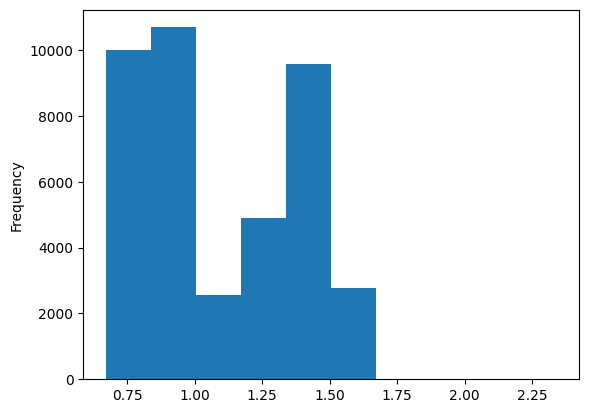

In [121]:
df["Dispense Volume(Stage1) Collect Result_Dam"].plot.hist()

In [84]:
time_of_resin = ["DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam", "DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam", "DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam"]
df[time_of_resin[0]].plot.bar();
df[time_of_resin[1]].plot.hist();
df[time_of_resin[2]].plot.hist();

<AxesSubplot:ylabel='Frequency'>

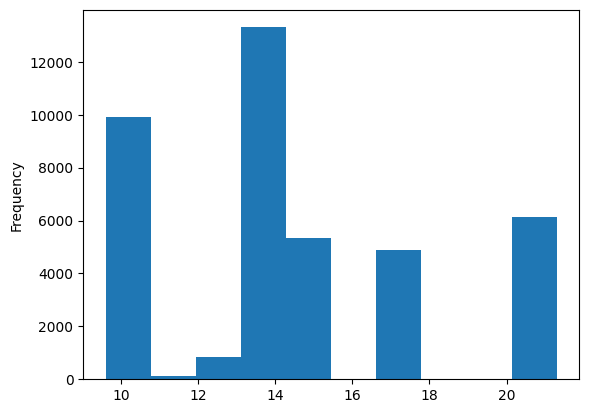

In [81]:
df["DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam"].plot.hist()

In [130]:
tmp = df[["DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam", "DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam", "DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam"]]

In [135]:
tmp.values.tolist()

[[14.9, 8.4, 14.7],
 [21.3, 4.9, 21.3],
 [14.7, 8.5, 14.7],
 [21.3, 8.4, 21.3],
 [9.7, 4.9, 9.6],
 [9.6, 4.9, 9.7],
 [13.2, 6.5, 13.2],
 [13.2, 7.6, 13.2],
 [9.6, 4.9, 9.7],
 [9.7, 4.8, 9.6],
 [14.7, 8.5, 14.7],
 [13.2, 8.2, 13.2],
 [21.3, 10.5, 21.3],
 [21.3, 5.4, 21.3],
 [9.6, 3.9, 9.7],
 [9.6, 4.9, 9.6],
 [9.6, 3.9, 9.7],
 [14.2, 8.1, 14.3],
 [13.2, 6.6, 13.1],
 [13.6, 8.1, 13.6],
 [14.2, 8.1, 14.3],
 [14.2, 8.3, 14.2],
 [9.6, 4.8, 9.7],
 [13.2, 8.1, 13.2],
 [14.7, 8.4, 14.7],
 [9.7, 4.9, 9.7],
 [13.2, 6.6, 13.1],
 [9.7, 4.9, 9.7],
 [17.0, 4.9, 17.0],
 [13.6, 8.1, 13.6],
 [13.2, 8.3, 13.2],
 [9.7, 4.9, 9.7],
 [13.2, 7.7, 13.1],
 [13.2, 6.7, 13.2],
 [14.2, 8.3, 14.3],
 [14.7, 8.5, 14.7],
 [17.0, 4.9, 17.0],
 [9.6, 4.8, 9.7],
 [17.0, 4.9, 17.0],
 [13.2, 6.6, 13.2],
 [21.3, 8.4, 21.3],
 [9.6, 3.9, 9.7],
 [21.3, 10.5, 21.3],
 [17.0, 4.9, 17.1],
 [14.9, 8.4, 14.7],
 [17.0, 4.9, 17.0],
 [13.2, 6.6, 13.2],
 [21.3, 10.6, 21.3],
 [14.9, 8.4, 14.7],
 [14.2, 8.2, 14.2],
 [13.2, 8.2, 13.1],
 [2

In [141]:
ttmp = tmp.apply(func="mean", axis=1)
ttmp = pd.DataFrame(ttmp)

<AxesSubplot:ylabel='Frequency'>

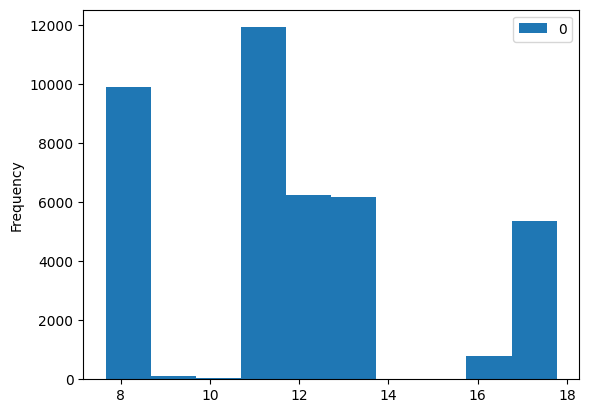

In [146]:
ttmp.plot.hist()

In [117]:
df[["DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam", "target"]].groupby("target").count()

,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam
target,
0,38156
1,2350


In [80]:
df["DISCHARGED SPEED OF RESIN Collect Result_Dam"].value_counts()

10    21046
16    19456
15        4
Name: DISCHARGED SPEED OF RESIN Collect Result_Dam, dtype: int64

In [94]:
df[["DISCHARGED SPEED OF RESIN Collect Result_Dam", "target"]].groupby("target").value_counts()
# 10은 0.066로 abnormal (1406/21046)
# 16은 0.048로 abnormal (943/19456)
# 15은 0.25로 abnormal (1/4) (전체가 4개밖에 없어서 비율이 높은 듯)

target    DISCHARGED SPEED OF RESIN Collect Result_Dam
AbNormal  10                                               1406
          16                                                943
          15                                                  1
Normal    10                                              19640
          16                                              18513
          15                                                  3
dtype: int64

In [77]:
df["CURE START POSITION Θ Collect Result_Dam"].equals(df["CURE END POSITION Θ Collect Result_Dam"])

True

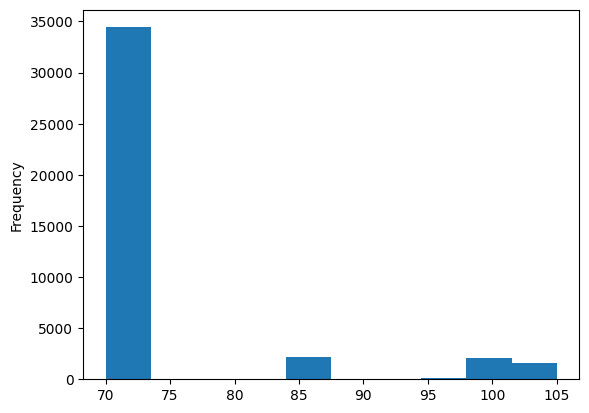

In [66]:
df["CURE SPEED Collect Result_Dam"].plot.hist();

<AxesSubplot:ylabel='Frequency'>

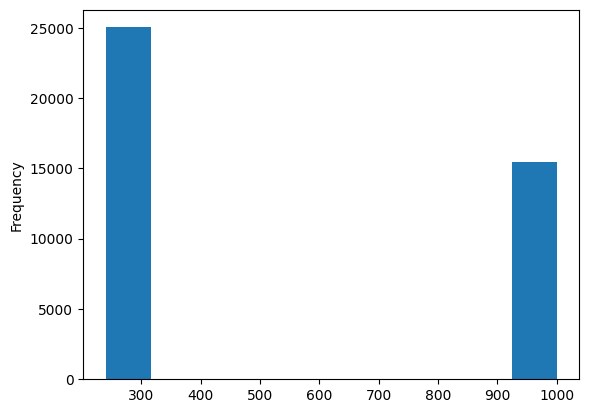

In [49]:
df["CURE END POSITION X Collect Result_Dam"].plot.hist()